<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/credit_card_default.csv')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0.0,1.0
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000.0,1.0
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000.0,0.0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000.0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22010 entries, 0 to 22009
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          22010 non-null  int64  
 1   LIMIT_BAL                   22010 non-null  int64  
 2   SEX                         22010 non-null  int64  
 3   EDUCATION                   22010 non-null  int64  
 4   MARRIAGE                    22010 non-null  int64  
 5   AGE                         22010 non-null  int64  
 6   PAY_1                       22010 non-null  int64  
 7   PAY_2                       22010 non-null  int64  
 8   PAY_3                       22010 non-null  int64  
 9   PAY_4                       22010 non-null  int64  
 10  PAY_5                       22010 non-null  int64  
 11  PAY_6                       22010 non-null  int64  
 12  BILL_AMT1                   22010 non-null  int64  
 13  BILL_AMT2                   220

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,...,22010.000000,22010.000000,22010.000000,22010.000000,2.201000e+04,22010.000000,22010.000000,22010.000000,22009.000000,22009.000000
mean,11005.500000,162958.822353,1.601499,1.841981,1.563062,35.320763,0.019355,-0.103362,-0.134575,-0.194366,...,41964.648796,39767.028487,38350.997819,5502.294548,5.788717e+03,4843.563744,4689.379782,4688.636983,5093.984597,0.227589
std,6353.884048,128599.858947,0.489601,0.775330,0.518326,9.353089,1.121979,1.200017,1.205260,1.166390,...,62183.500950,59676.835982,58813.394651,15154.625344,2.128845e+04,15982.941230,14862.497541,15029.460532,17401.849164,0.419285
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5503.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2397.000000,1791.250000,1240.500000,1000.000000,7.800000e+02,350.000000,270.500000,231.250000,29.000000,0.000000
50%,11005.500000,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.000000,18253.000000,17150.000000,2091.000000,2.000000e+03,1644.500000,1500.000000,1500.000000,1436.000000,0.000000
75%,16507.750000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,51751.500000,49633.000000,48755.500000,5000.000000,5.000000e+03,4136.500000,4000.000000,4000.000000,4000.000000,0.000000
max,22010.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,497000.000000,417990.000000,528666.000000,1.000000


In [6]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
#checking for missing values
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      1
default payment next month    1
dtype: int64

In [8]:
#missing value handling

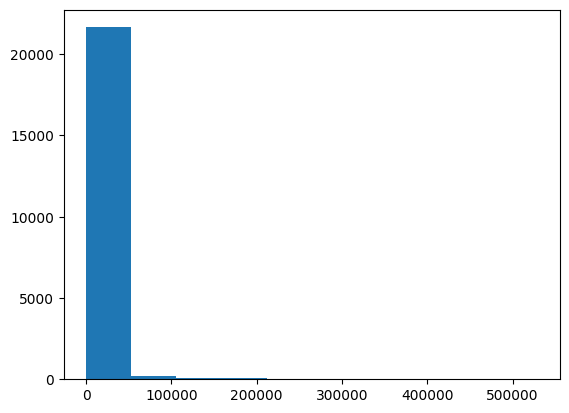

In [9]:
plt.hist(data['PAY_AMT6'])
plt.show()

In [10]:
data['PAY_AMT6']=data['PAY_AMT6'].fillna(data['PAY_AMT6'].mean())

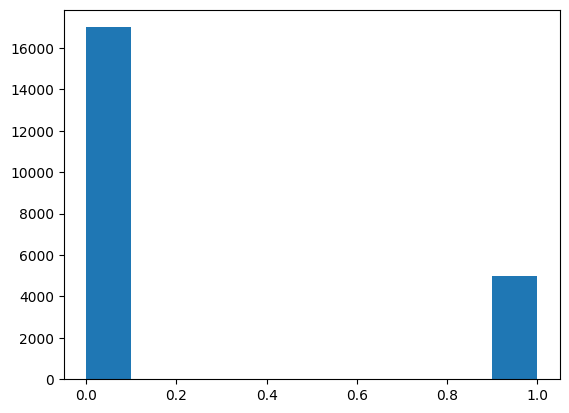

In [11]:
plt.hist(data['default payment next month'])
plt.show()

In [12]:
data['default payment next month']=data['default payment next month'].fillna(data['default payment next month'].mean())

In [13]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [14]:
#scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['LIMIT_BAL','AGE','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']])
data[['LIMIT_BAL','AGE','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]=scaler.transform(data[['LIMIT_BAL','AGE','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']])


In [16]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,0.010101,2,0.333333,1,0.051724,0.4,0.4,0.1,0.1,...,0,0,0,0,689,0,0,0,0.0,1.0
1,2,0.111111,2,0.333333,2,0.086207,0.1,0.4,0.2,0.2,...,3272,3455,3261,0,1000,1000,1000,0,2000.0,1.0
2,3,0.080808,2,0.333333,2,0.224138,0.2,0.2,0.2,0.2,...,14331,14948,15549,1518,1500,1000,1000,1000,5000.0,0.0
3,4,0.040404,2,0.333333,1,0.275862,0.2,0.2,0.2,0.2,...,28314,28959,29547,2000,2019,1200,1100,1069,1000.0,0.0
4,5,0.040404,1,0.333333,1,0.620690,0.1,0.2,0.1,0.2,...,20940,19146,19131,2000,36681,10000,9000,689,679.0,0.0


In [17]:
x=data.drop(['default payment next month'],axis=1)
y=data['default payment next month']


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [21]:
y_train = y_train.map(lambda x: 1 if x > 0 else 0)

In [22]:
metric_k=[]#empty list created
neighbors=np.arange(3,14)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)#p=1 manhattan,p=2 euclidean based
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

In [23]:
metric_k

[0.7268762493185535,
 0.7646738142831183,
 0.7457750318008359,
 0.7704888242776667,
 0.7555878611666363,
 0.7741232055242595,
 0.7644920952207886,
 0.7715791386516445,
 0.7670361620934036,
 0.7717608577139742,
 0.7646738142831183]

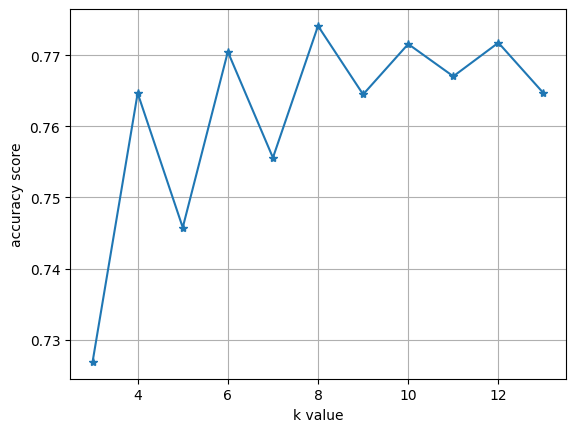

In [24]:
plt.plot(neighbors,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()
plt.show()

In [25]:

#now make model using k=8

In [26]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)#p=1 manhattan,p=2 euclidean based
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [27]:
y_pred_knn=classifier.predict(x_test)

In [28]:
confusion_matrix(y_test,y_pred_knn)

array([[4153,  142],
       [1101,  107]])

In [29]:
accuracy_score(y_test,y_pred_knn)

0.7741232055242595

In [33]:
#SVM